In [1]:
import os
import pandas as pd
import numpy as np
from bokeh.plotting import *
from bokeh.models import ColumnDataSource

DATA_FILE = "/Users/idownard/Desktop/quicken-export-2017-06-20.csv"
df=pd.read_csv(DATA_FILE, thousands=',')
df.head()

,Date,Payee,Category,Amount,Balance,Memo/Notes
0,6/19/2017,Slice Pizza,Food & Dining:Restaurants,4.00,-1965.19,NaN
1,6/19/2017,Jim & Patty's Coffee,Dining,-3.25,-1961.19,NaN
2,6/19/2017,Fred M Fuel,Auto,-22.17,-1957.94,NaN
3,6/17/2017,NEXT ADVENTURE INC,Recreation,-24.88,-1935.77,NaN
4,6/17/2017,Portland Water Bureau,Utilities:Water,-239.16,-1910.89,NaN


In [2]:
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')

# ignore refunds and deposits to credit card account
purchases=df[df['Amount']<0]
# reverse the data so the accumulator starts from oldest date
purchases=purchases.iloc[::-1]
# create a column to count days elapsed since first purchase
purchases['Day']=(purchases['Date'] - purchases['Date'].iloc[0]) / np.timedelta64(1, 'D')
# ensure purchase amounts are non-negative
cleaned_purchases=pd.DataFrame.from_dict(data=dict(day=purchases['Day'],
                                           date=purchases['Date'], 
                                           purchase_amount=abs(purchases['Amount']), 
                                           accumulated_purchases=abs(purchases['Amount']).cumsum()))
source = ColumnDataSource(data=cleaned_purchases)
# create and render a scatter plot for accumulated purchases
plt = figure(width=700, height=350, x_axis_type="datetime", title='Accumulated Purchases')
plt.circle('date', 'accumulated_purchases', source=source)
output_notebook()
#show(plt)

Loading BokehJS ...

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

x=cleaned_purchases.day
y=cleaned_purchases.accumulated_purchases

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.90, random_state=42)

lr = LinearRegression()
# lr = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)
lr.fit(x_train[:, np.newaxis], y_train)  # x needs to be 2d for LinearRegression
y_lr = lr.predict(x_test[:, np.newaxis])
X_new = [[600]]
print(lr.predict(X_new))

[ 52432.13124914]


/usr/local/lib/python2.7/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


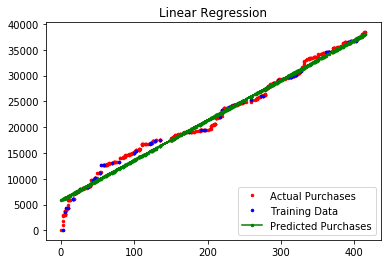

In [4]:
fig = plt.figure()
plt.plot(x, y, 'r.', markersize=5)
plt.plot(x_train, y_train, 'b.', markersize=5)
plt.plot(x_test, y_lr, 'g.-', markersize=5)
# plt.plot(x, y_lr, 'b-')
plt.legend(('Actual Purchases', 'Training Data', 'Predicted Purchases'), loc='lower right')
plt.title('Linear Regression')
plt.show()

In [7]:
# predicted_amounts=pd.DataFrame.from_dict(data=dict(x_test=x_test,y_lr=y_lr))

# fitted_source = ColumnDataSource(data=predicted_amounts)
# create and render a scatter plot for accumulated purchases
plt = figure(width=700, height=350, title='Linear Regression over Accumulated Purchases')
#plt.circle('x_test', 'y_lr', source=predicted_amounts)
plt.circle('day', 'accumulated_purchases', source=cleaned_purchases)
plt.line([x_test.min(), x_test.max()], [y_lr.min(), y_lr.max()], color='red', line_width=3)

output_notebook()
show(plt)

Loading BokehJS ...

In [8]:
purchases['Date'].size

651